Завдання 1. Провести розвідувальний аналіз даних EDA (Exploratory
data analysis) на наборі даних mlbootcamp_train_Soroka.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.ticker
import matplotlib.pyplot as plt
import seaborn as sns
# ігноруємо warnings
import warnings
warnings.filterwarnings("ignore")

sns.set_context(
"notebook",
font_scale = 1.5,
rc = {
 "figure.figsize" : (12, 9),
 "axes.titlesize" : 18
 }
)

Далі зчитуємо дані з файлу і дивимося перші 5 записів

In [9]:
df = pd.read_csv("/content/sample_data/mlbootcamp_train_Soroka.csv", sep=';',index_col='id')

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Далі проведемо розвідувальний аналіз даних

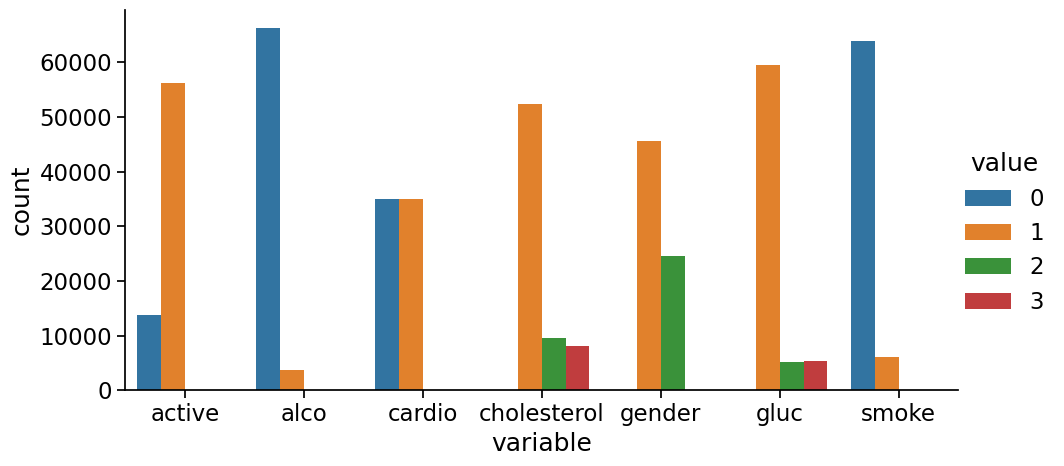

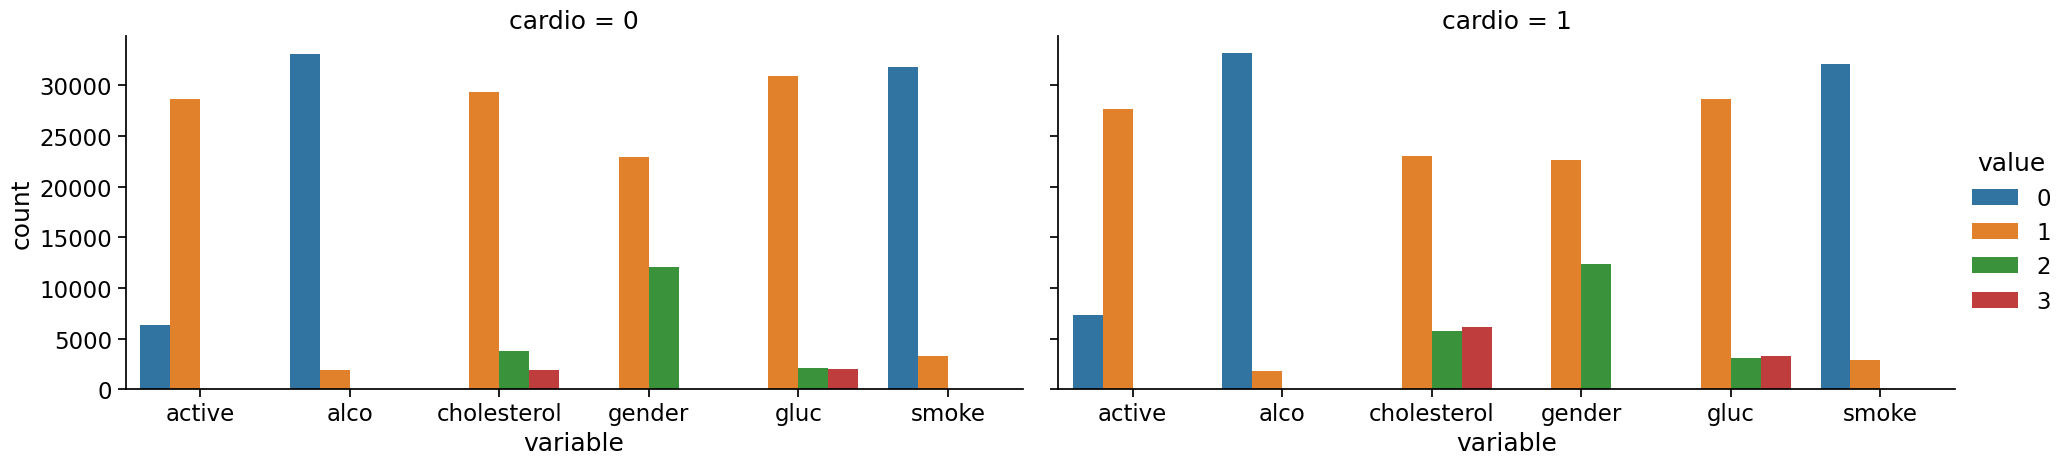

In [10]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol','gluc', 'smoke', 'alco','active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable','value'])['value'].count())\
.sort_index(level=[0, 1]) \
.rename(columns={'value': 'count'}) \
.reset_index()

sns.catplot(x='variable', y='count', hue='value', data=df_uniques, kind='bar', aspect=2)

df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol','gluc','smoke', 'alco','active'],id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value','cardio'])['value'].count()) \
.sort_index(level=[0, 1]) \
.rename(columns={'value': 'count'}) \
.reset_index()

sns.catplot(x='variable', y='count', hue='value', col='cardio', data=df_uniques, kind='bar',  aspect=2)

Далі отримуємо статистику за унікальними значеннями

In [11]:
for c in df.columns:
 n = df[c].nunique()
 print(c)
 if n <= 3:
  print(n, sorted(df[c].value_counts().to_dict().items())
)
 else:
  print(n)
print(10 * '-')

age
8076
gender
2 [(1, 45530), (2, 24470)]
height
109
weight
287
ap_hi
153
ap_lo
157
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
smoke
2 [(0, 63831), (1, 6169)]
alco
2 [(0, 66236), (1, 3764)]
active
2 [(0, 13739), (1, 56261)]
cardio
2 [(0, 35021), (1, 34979)]
----------


Провести візуальний аналіз набору даних
mlbootcamp_train_Soroka.csv

Побудова кореляційної матриці

In [12]:
corr_matrix = df.corr()

Побудова heatmap

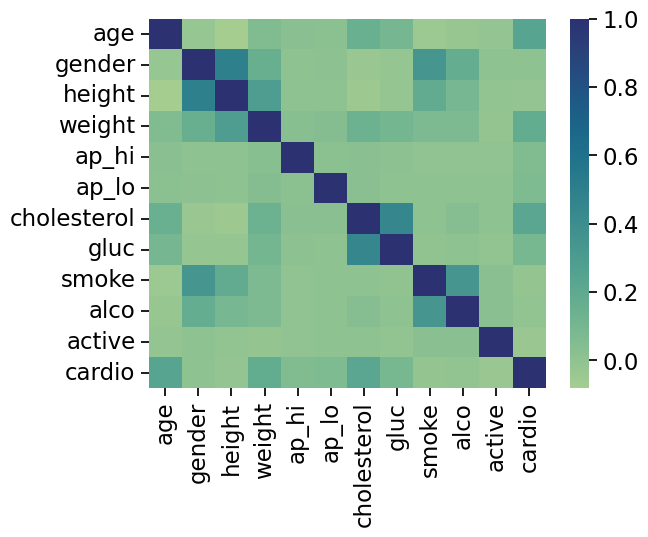

In [13]:
sns.heatmap(corr_matrix, cmap="crest")
plt.show()

Найбільша кореляція height - з weight і ap_hi

In [14]:
longformat = pd.melt(frame=df, value_vars='height',id_vars='gender')
longformat.head()

,gender,variable,value
0,2,height,168
1,1,height,156
2,1,height,165
3,2,height,169
4,1,height,156


Далі побудуємо графік (violinplot) розподіл росту людини за гендерною ознакою

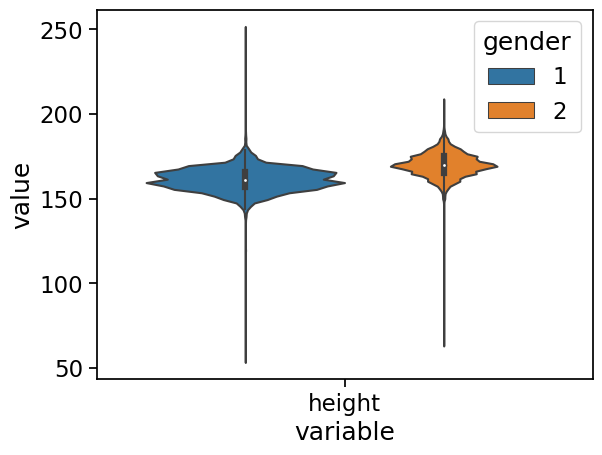

In [15]:
sns.violinplot(data=longformat, x='variable', y='value', hue='gender', scale='count');
plt.show()

Та два окремих kdeplot росту і ваги

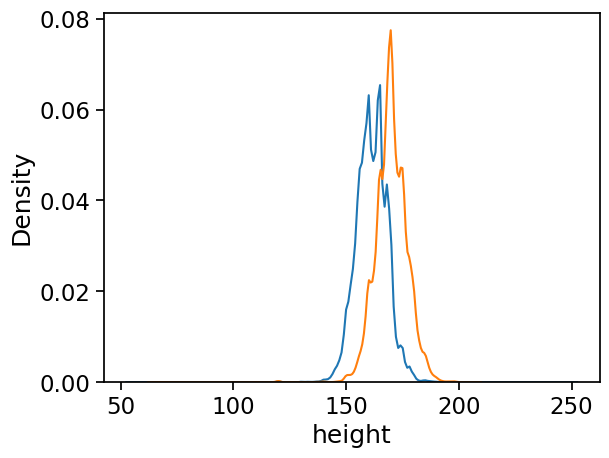

In [16]:
sns.kdeplot(df[df['gender'] == 1]['height'])
sns.kdeplot(df[df['gender'] == 2]['height'])
plt.show()

Далі побудуємо кореляційну матрицю з коефіцієнтом Спірмена

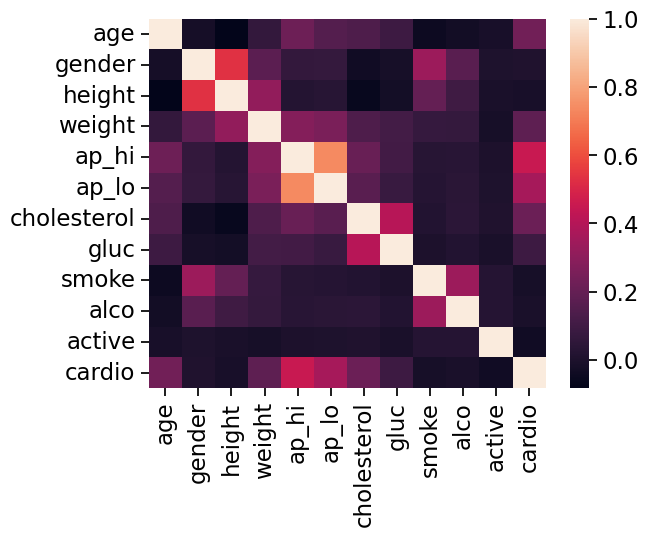

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.020176,-0.082292,0.061559,0.219087,0.156700,0.140113,0.091791,-0.047471,-0.030078,-0.010422,0.234429
gender,-0.020176,1.000000,0.533805,0.172480,0.063174,0.066374,-0.035730,-0.018866,0.338135,0.170966,0.005866,0.008109
height,-0.082292,0.533805,1.000000,0.313569,0.019381,0.030534,-0.058940,-0.024369,0.197632,0.096670,-0.007367,-0.012383
weight,0.061559,0.172480,0.313569,1.000000,0.277749,0.254420,0.137908,0.109901,0.071676,0.068088,-0.014894,0.182701
ap_hi,0.219087,0.063174,0.019381,0.277749,1.000000,0.735436,0.208722,0.105334,0.028929,0.033243,-0.001268,0.451885
ap_lo,0.156700,0.066374,0.030534,0.254420,0.735436,1.000000,0.167401,0.082474,0.026172,0.038862,0.003401,0.362572
cholesterol,0.140113,-0.035730,-0.058940,0.137908,0.208722,0.167401,1.000000,0.407803,0.015220,0.041285,0.007573,0.215117
gluc,0.091791,-0.018866,-0.024369,0.109901,0.105334,0.082474,0.407803,1.000000,0.000468,0.018584,-0.008610,0.091488
smoke,-0.047471,0.338135,0.197632,0.071676,0.028929,0.026172,0.015220,0.000468,1.000000,0.340094,0.025858,-0.015486
alco,-0.030078,0.170966,0.096670,0.068088,0.033243,0.038862,0.041285,0.018584,0.340094,1.000000,0.025476,-0.007330


In [17]:
sns.heatmap(df.corr(method='spearman'));
plt.show()
df.corr(method='spearman')

Дві ознаки, які найбільше корелюють з ознакою height за Спірменом, - це weight та gender

Значення рангової кореляції у цих ознак є великим (відносно) через те, що ці ознаки мають сильну лінійну залежність з ознакою height, тобто, коли значення однієї ознаки зростають, значення іншої ознаки також зростають (зменшуються)

Далі побудуємо графік здоровий/хворий згідно завдання

<Axes: xlabel='age_years', ylabel='count'>

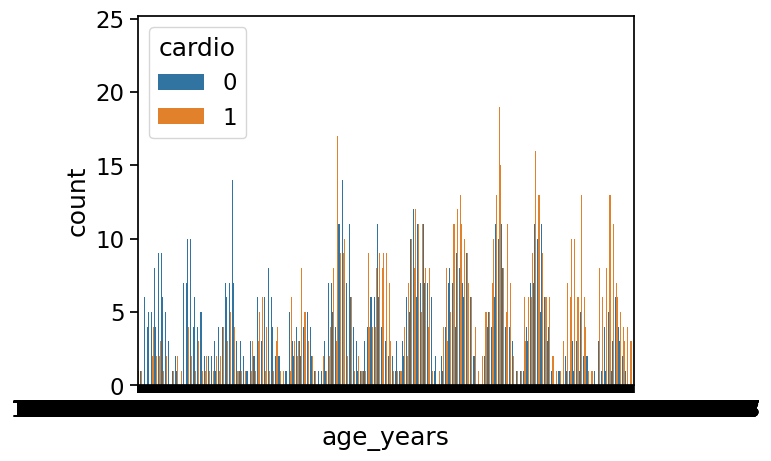

In [18]:
df['age_years'] = df['age'] / 12
sns.countplot(x='age_years', hue='cardio', data=df)

Завдання 3. Провести розвідувальний і візуальний аналіз за
варіантами. Варіант 9.

                                        bookId  \
0                     2767052-the-hunger-games   
1  2.Harry_Potter_and_the_Order_of_the_Phoenix   
2                   2657.To_Kill_a_Mockingbird   
3                     1885.Pride_and_Prejudice   
4                               41865.Twilight   

                                       title                 series  \
0                           The Hunger Games    The Hunger Games #1   
1  Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                      To Kill a Mockingbird  To Kill a Mockingbird   
3                        Pride and Prejudice                    NaN   
4                                   Twilight   The Twilight Saga #1   

                                      author  rating  \
0                            Suzanne Collins    4.33   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                 Harper Lee    4.28   
3  Jane Austen, Anna Quindlen (Introduction)    

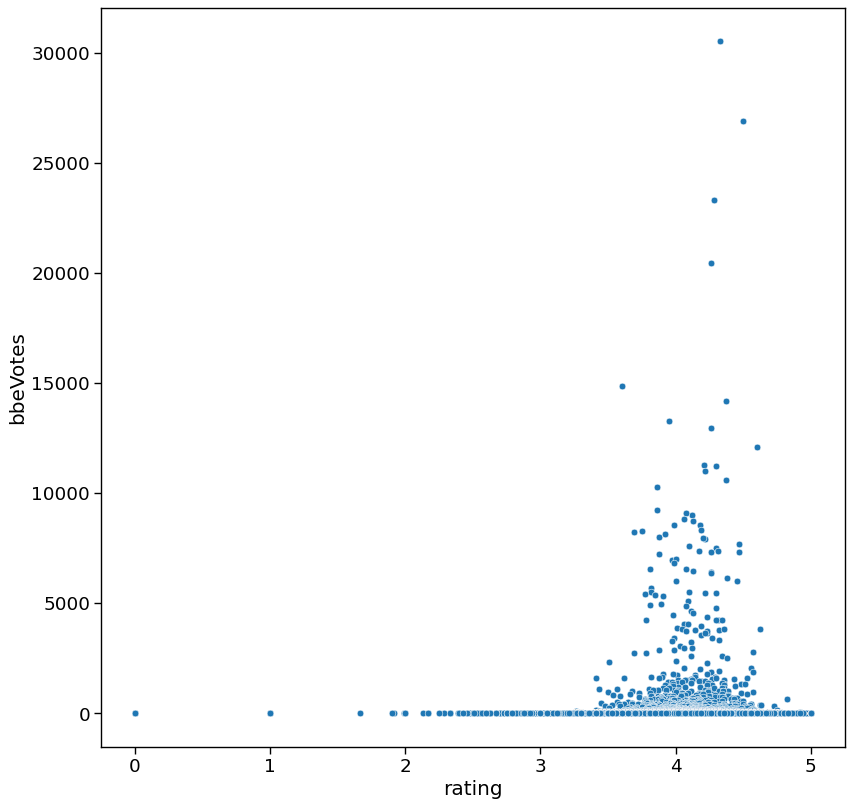

bookId
52424
----------
title
49927
----------
series
22802
----------
author
28227
----------
rating
261
----------
description
50888
----------
language
81
----------
isbn
48072
----------
genres
44154
----------
characters
12448
----------
bookFormat
136
----------
edition
1788
----------
pages
1365
----------
publisher
11110
----------
publishDate
10635
----------
firstPublishDate
8024
----------
awards
9215
----------
numRatings
19347
----------
ratingsByStars
49908
----------
likedPercent
66
----------
setting
4651
----------
coverImg
51819
----------
bbeScore
3541
----------
bbeVotes
649
----------
price
3776
----------
**********


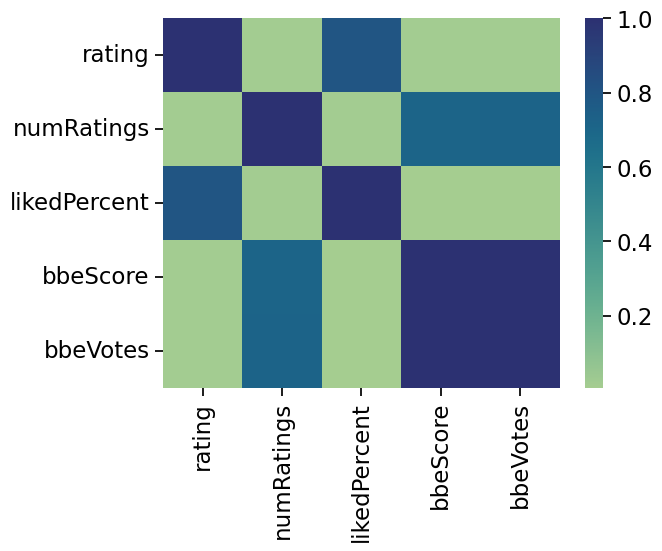

                rating  numRatings  likedPercent  bbeScore  bbeVotes
rating        1.000000    0.014862      0.805538  0.015355  0.015552
numRatings    0.014862    1.000000      0.014014  0.709224  0.719138
likedPercent  0.805538    0.014014      1.000000  0.005688  0.005931
bbeScore      0.015355    0.709224      0.005688  1.000000  0.999303
bbeVotes      0.015552    0.719138      0.005931  0.999303  1.000000


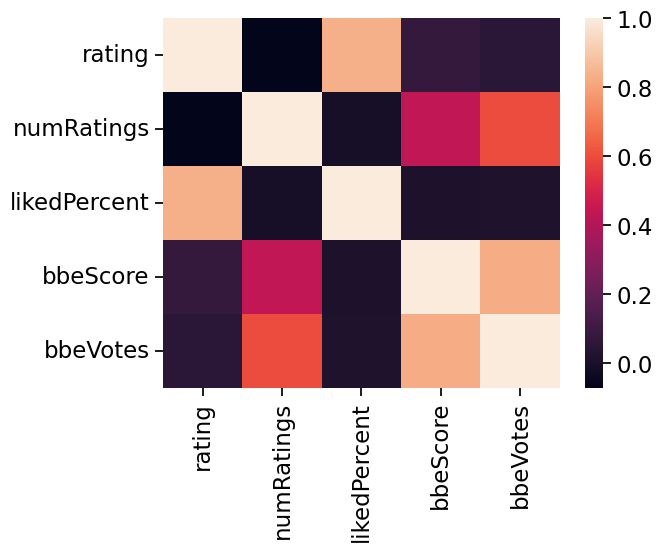

In [19]:
import numpy as np
import pandas as pd
import matplotlib.ticker
import matplotlib.pyplot as plt
import seaborn as sns
# ігноруємо warnings
import warnings
warnings.filterwarnings("ignore")
sns.set_context(
"notebook",
font_scale = 1.5,
rc = {
 "figure.figsize" : (12, 9),
 "axes.titlesize" : 18
 }
)

df = pd.read_csv('/content/sample_data/books_1.Best_Books_Ever.csv', sep=',')
print(df.head())
print(df.describe())
print(df.info())

# Графік залежностей рейтингу від голосів BBE
plt.figure(figsize=(12, 12), dpi=80)
sns.scatterplot(x='bbeVotes', y='rating', data=df)
plt.show()

for c in df.columns:
 n = df[c].nunique()
 print(c)
 if n <= 5:
  print(n, sorted(df[c].value_counts().to_dict().items())
)
 else:
  print(n)
  print(10 *'-')
print(10 * '*')

corr_matrix = df.corr()

# Побудова heatmap
sns.heatmap(corr_matrix, cmap="crest")
plt.show()
corr_matrix = df.corr()
print(corr_matrix)

longformat = pd.melt(frame=df, value_vars='rating',id_vars='bbeVotes')
longformat.head()

# Кореляційна матриця, з коефіцієнтем Спірмена
sns.heatmap(df.corr(method='spearman'));


